In [1]:
# import all necessary libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_bloch_multivector, array_to_latex
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Initialize a Quantum Circuit with 4 qubits
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
circuit = QuantumCircuit(qr, cr)
print(circuit)

      
q0_0: 
      
q0_1: 
      
q0_2: 
      
q0_3: 
      
c0: 4/
      


In [4]:
# Set qubits into basis states using ALL Pauli gates

circuit.x(1)    # Pauli-X gate - flips |0⟩ to |1⟩  
circuit.y(2)    # Pauli-Y gate - |0⟩ to i|1⟩
circuit.z(3)    # Pauli-Z gate - applies phase to |1⟩ (no effect on |0⟩)
print(circuit)

           
q0_0: ─────
      ┌───┐
q0_1: ┤ X ├
      ├───┤
q0_2: ┤ Y ├
      ├───┤
q0_3: ┤ Z ├
      └───┘
c0: 4/═════
           


In [5]:
# Create circuit without measurements for statevector
circuit_statevector = QuantumCircuit(4)

# Apply the same Pauli gates (X, Y, Z only)
circuit_statevector.x(1)    # Pauli-X on qubit 1
circuit_statevector.y(2)    # Pauli-Y on qubit 2  
circuit_statevector.z(3)    # Pauli-Z on qubit 3

# Get the statevector
statevector = Statevector.from_instruction(circuit_statevector)
array_to_latex(statevector)

<IPython.core.display.Latex object>

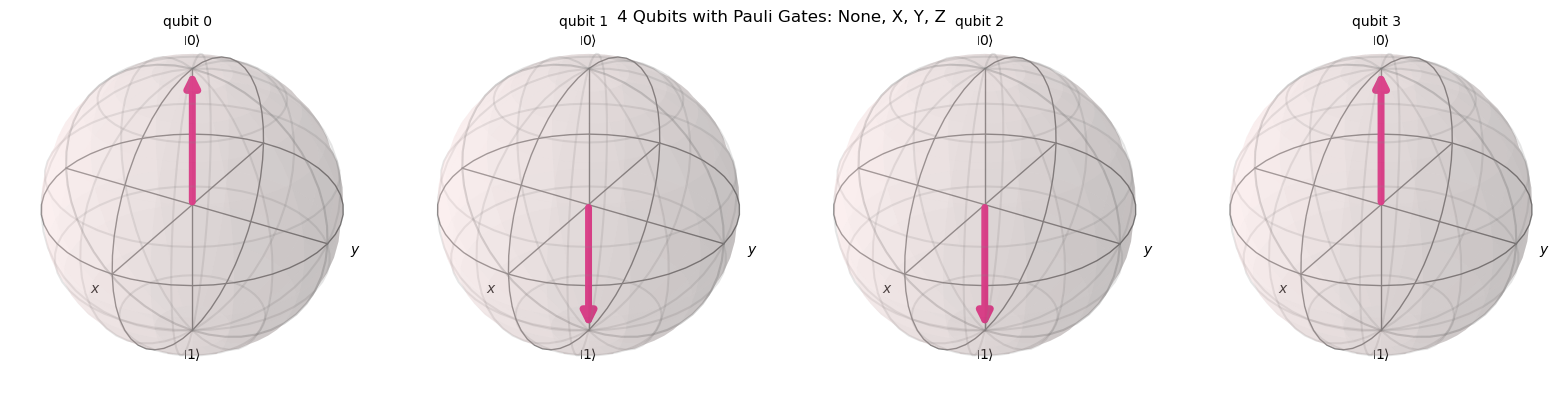

Explanation of each sphere:
🔵 Sphere 1 (Qubit 0): No gate - stays at |0⟩ (north pole)
🔴 Sphere 2 (Qubit 1): Pauli-X - flipped to |1⟩ (south pole)
🟢 Sphere 3 (Qubit 2): Pauli-Y - rotated to i|1⟩ (side)
🟡 Sphere 4 (Qubit 3): Pauli-Z - phase applied (still at |0⟩)


In [8]:
# Visualize all 4 qubits on Bloch spheres
plot_bloch_multivector(statevector)
plt.suptitle("4 Qubits with Pauli Gates: None, X, Y, Z")
plt.show()

print("Explanation of each sphere:")
print("🔵 Sphere 1 (Qubit 0): No gate - stays at |0⟩ (north pole)")
print("🔴 Sphere 2 (Qubit 1): Pauli-X - flipped to |1⟩ (south pole)")  
print("🟢 Sphere 3 (Qubit 2): Pauli-Y - rotated to i|1⟩ (side)")
print("🟡 Sphere 4 (Qubit 3): Pauli-Z - phase applied (still at |0⟩)")

In [9]:
# Add measurements to the original circuit
circuit.measure(qr, cr)

print("Final circuit with measurements:")
print(circuit)

# Run simulation
simulator = AerSimulator()
job = simulator.run(circuit, shots=1024)
result = job.result()
counts = result.get_counts()
print(f"Results: {counts}")

Final circuit with measurements:
           ┌─┐         
q0_0: ─────┤M├─────────
      ┌───┐└╥┘┌─┐      
q0_1: ┤ X ├─╫─┤M├──────
      ├───┤ ║ └╥┘┌─┐   
q0_2: ┤ Y ├─╫──╫─┤M├───
      ├───┤ ║  ║ └╥┘┌─┐
q0_3: ┤ Z ├─╫──╫──╫─┤M├
      └───┘ ║  ║  ║ └╥┘
c0: 4/══════╩══╩══╩══╩═
            0  1  2  3 
Results: {'0110': 1024}
